# Импорт библитек

In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from datetime import datetime

# Функции

In [72]:
def occupancy(row):
    if row.model == 'Boeing 737-300':
        return  row.total_seat / 149
    if row.model == 'Sukhoi Superjet-100':
        return  row.total_seat / 103
    

In [ ]:
def fuel(row):
    if row.model == 'Boeing 737-300':
        return  row.scheduled_time / 60 * 2400
    if row.model == 'Sukhoi Superjet-100':
        return  row.scheduled_time / 60 * 1700

# Загрузка и анализ данных

In [49]:
data = pd.read_csv('sql_result.csv')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_cost        236 non-null    float64
 1   total_seat         254 non-null    int64  
 2   flight_id          254 non-null    int64  
 3   scheduled_arrival  254 non-null    object 
 4   scheduled_time     254 non-null    float64
 5   real_time          254 non-null    float64
 6   city               254 non-null    object 
 7   model              254 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 16.0+ KB


In [51]:
data.sample(5)

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model
9,1738400.0,120,136164,2017-01-07T11:45:00Z,100.0,100.0,Moscow,Boeing 737-300
222,733800.0,92,202695,2017-02-17T10:50:00Z,50.0,50.0,Belgorod,Sukhoi Superjet-100
191,NaN,0,181076,2017-01-09T13:20:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
253,746400.0,94,202916,2017-01-20T10:50:00Z,50.0,50.0,Belgorod,Sukhoi Superjet-100
99,714900.0,89,136780,2017-02-24T10:15:00Z,50.0,50.0,Belgorod,Sukhoi Superjet-100


Проверим имеются ли пропуски

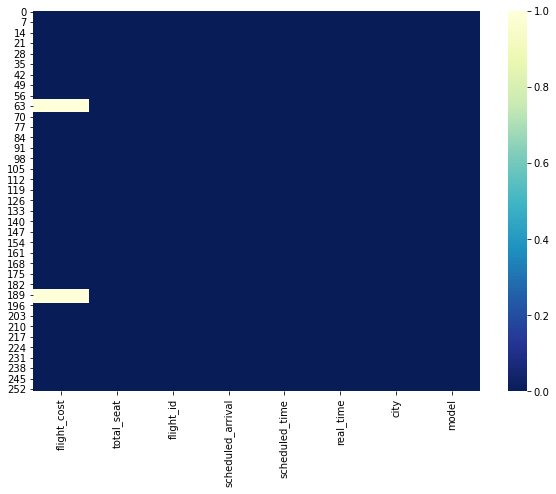

In [52]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.isnull(), cmap="YlGnBu_r");

Имеются 2 облясти пропусков в столбце flight_cost (общая стоимость полета)

In [53]:
data_nan = data[data.flight_cost.isnull() == True]
display(data_nan)
data_nan.city.unique()

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model
59,NaN,0,136511,2017-02-21T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
60,NaN,0,136513,2017-02-28T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
61,NaN,0,136514,2017-02-07T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
62,NaN,0,136523,2017-01-10T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
63,NaN,0,136540,2017-01-17T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
64,NaN,0,136544,2017-01-31T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
65,NaN,0,136546,2017-01-03T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
66,NaN,0,136560,2017-01-24T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
67,NaN,0,136567,2017-02-14T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
186,NaN,0,181042,2017-02-06T13:20:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300


array(['Novokuznetsk'], dtype=object)

Видим что данным по стоимости полетов в Новокузнецк отсутствуют.
В виду отсутствия данных исключим Новокузнецк из анализа.

In [54]:
data.dropna(axis=0, inplace=True)

Посмотрим имеются ли задержки в перелетах (доп. круги и т.д.)

In [55]:
sum(data.scheduled_time - data.real_time)

0.0

Создадим дополнительные признаки

In [56]:
data.model.unique()

array(['Boeing 737-300', 'Sukhoi Superjet-100'], dtype=object)

Колличество мест:
* Boeing 737-300 = 149
* Sukhoi Superjet-100 = 103


Определим заполняемость салона при авиа перевозках

In [79]:
data['occupancy'] = data.apply(occupancy, axis=1)

Расход топлива (https://class-tour.com/rashod-topliva-raznyh-samoletov/):
* Sukhoi Superjet-100 = 1700 кг/ч
* Boeing 737-300 = 2400 кг/ч

In [85]:
data['fuel'] = data.apply(fuel, axis=1)

Определим прибыльность по формуле: flight_cost - fuel * стоимость топлива

Стоимость топлива в 2017 г. для Анапы составляла (https://favt.gov.ru/stat-date-gsm-price/?id=7329):
* январь 41435 р за тонну
* февраль 39553 р за тонну
* декабрь 47101 р за тонну

In [89]:
data.scheduled_arrival = data.scheduled_arrival.apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))

In [126]:
def profitability(row):
    if row.scheduled_arrival.month == 1:
        return row.flight_cost - row.fuel / 1000 * 41435
    if row.scheduled_arrival.month == 2:
        return row.flight_cost - row.fuel / 1000 * 39553
    if row.scheduled_arrival.month == 12:
        return row.flight_cost - row.fuel / 1000 * 47101

In [127]:
data['profitability'] = data.apply(profitability, axis=1)

In [129]:
data

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model,occupancy,fuel,profitability
0,1653000.0,113,136119,2017-01-03,100.0,100.0,Moscow,Boeing 737-300,0.758389,4000.000000,1.487260e+06
1,1605400.0,109,136120,2017-02-24,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.447188e+06
2,1431000.0,97,136122,2017-01-08,100.0,100.0,Moscow,Boeing 737-300,0.651007,4000.000000,1.265260e+06
3,1556600.0,107,136130,2017-02-13,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.398388e+06
4,1812800.0,124,136131,2017-01-28,100.0,100.0,Moscow,Boeing 737-300,0.832215,4000.000000,1.647060e+06
...,...,...,...,...,...,...,...,...,...,...,...
249,721200.0,92,202891,2017-01-31,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.893204,1416.666667,6.625004e+05
250,639300.0,85,202898,2017-01-16,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.825243,1416.666667,5.806004e+05
251,739500.0,93,202911,2017-01-19,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.902913,1416.666667,6.808004e+05
252,733800.0,92,202913,2017-01-22,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.893204,1416.666667,6.751004e+05


Как видно из profitability данная формула не эффективна ввиду с большого числа других расходов

![](https://studref.com/im/29/5108/564032-13.jpg)

Согласно стать в Комерсанте от 17.03.2017 «Если загрузка кресел меньше, чем 75%, то рейс становится нерентабельным», как видно уже из названия, оптимальным параметром для нас будет occupancy (заполняемость) с порогом 0,75

Определим не рентабельные авиарейсы

In [136]:
display(data[data.occupancy < 0.75])
print(f'итого: {data.flight_id[data.occupancy < 0.75].nunique()} рейсов')

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model,occupancy,fuel,profitability
1,1605400.0,109,136120,2017-02-24,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.447188e+06
2,1431000.0,97,136122,2017-01-08,100.0,100.0,Moscow,Boeing 737-300,0.651007,4000.000000,1.265260e+06
3,1556600.0,107,136130,2017-02-13,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.398388e+06
7,1604200.0,109,136146,2017-02-09,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.445988e+06
10,1567600.0,110,136165,2017-02-22,100.0,100.0,Moscow,Boeing 737-300,0.738255,4000.000000,1.409388e+06
11,1617600.0,110,136172,2017-01-15,100.0,100.0,Moscow,Boeing 737-300,0.738255,4000.000000,1.451860e+06
12,1434600.0,99,136178,2017-01-29,100.0,100.0,Moscow,Boeing 737-300,0.664430,4000.000000,1.268860e+06
14,1520000.0,104,136185,2017-01-14,100.0,100.0,Moscow,Boeing 737-300,0.697987,4000.000000,1.354260e+06
15,1495600.0,100,136202,2017-01-05,100.0,100.0,Moscow,Boeing 737-300,0.671141,4000.000000,1.329860e+06
16,1457800.0,107,136204,2017-02-23,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.299588e+06


итого: 46 рейсов


In [138]:
print(f'соотношение рентабельнох и не рентабельных авиарейсов {data.flight_id[data.occupancy < 0.75].nunique() / data.flight_id.nunique()}')


соотношение рентабельнох и не рентабельных авиарейсов 0.19491525423728814


2

Построим пару графиков для презинтации

In [151]:
data.city.unique()


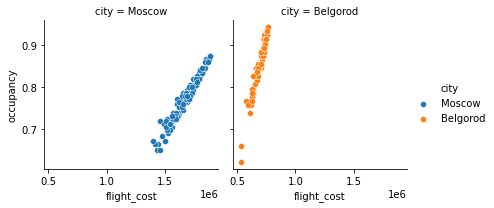

In [155]:
grid = sns.FacetGrid(data, col="city", hue="city", col_wrap=2)
grid.map(sns.scatterplot, "flight_cost", "occupancy")
grid.add_legend();

# Выводы

Из анализа видно:
* около 20% рейсов летавших в Анапу не рентабельны
* Большая часть не рентабильных рейсов из Москвы
* при анализе не учитывальсь рейсы из Новокузнецка ввиду отсутствия информации о стоимости и колличестве пассажиров

Рекомендуется частичное уменьшение колличества рейсов на этих направлениях